# Imports, Variables and Functions

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import pandas as pd
import numpy as np
import os

path = 'power-consumption'
processed_path = os.path.join(path, '.processed')
processed_file = os.path.join(processed_path, 'household-pow.csv')

In [2]:
def plot_time_values(input_df, size=(18,12)):
    plt.figure(figsize=size)
    for i, column in enumerate(input_df.columns):
        plt.subplot(len(input_df.columns), 2, i + 1)
        plt.title(column)
        plt.plot(input_df.index, input_df[column])
        plt.grid(True)
    plt.tight_layout()

In [3]:
def plot_time_with_heatmap(x, y, x_label, y_label, title, size=(24,6)):
    _, (ax1,ax2) = plt.subplots(nrows=2, sharex=True, figsize=size, gridspec_kw={'height_ratios': [1, 3]})
    extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
    extent = mdates.date2num(extent)
    ax1.set_title(title)
    ax1.imshow(np.expand_dims(y, axis=0), cmap="plasma", aspect="auto", extent=extent)
    ax1.set_yticks([])
    ax2.plot(x,y)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)

# Exploratory Analysis - Household Power Consumption Dataset
The dataset is a multivariate time series that describes the electricity consumption for a single household collected over four years between December 2006 and November 2010 taking observations of power consumption every minute.

In [4]:
df = pd.read_csv(processed_file, header=0, infer_datetime_format=True, parse_dates=['Date_time'], index_col=['Date_time'])
df.sort_values(by=['Date_time'], inplace=True)

In [5]:
df.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Date_time,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [6]:
df.tail(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Date_time,,,,,,,,
2010-12-11 23:57:00,0.688,0.062,244.20,2.8,0.0,0.0,0.0,11.466667
2010-12-11 23:58:00,0.688,0.062,244.21,2.8,0.0,0.0,0.0,11.466667
2010-12-11 23:59:00,0.688,0.064,244.65,2.8,0.0,0.0,0.0,11.466667


In [7]:
df.shape

(2075259, 8)

Dataset description, where:
- global_active_power -> Household global minute-averaged active power (in kilowatts)
- global_reactive_power -> Household global minute-averaged reactive power (in kilowatts)
- voltage -> Minute-averaged voltage (in volts)
- global_intensity -> Household global minute-averaged current intensity (in amperes)
- sub_metering_1 -> Corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- sub_metering_2 -> Corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- sub_metering_3 -> Corresponds to an electric water-heater and an air-conditioner.
- sub_metering_4 -> Corresponds to electrical equipment not measured in sub-meterings 1, 2 and 3.

In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06,2.04928e+06
mean,1.09162,0.123714,240.84,4.62776,1.12192,1.29852,6.45845,9.31469
std,1.05729,0.112722,3.23999,4.4444,6.15303,5.82203,8.43715,9.58592
min,0.076,0,223.2,0.2,0,0,0,-2.4
25%,0.308,0.048,238.99,1.4,0,0,0,3.8
50%,0.602,0.1,241.01,2.6,0,0,1,5.5
75%,1.528,0.194,242.89,6.4,0,1,17,10.3667
max,11.122,1.39,254.15,48.4,88,80,31,124.833


Resample the dataset to fit hourly, daily and weekly average ranges

In [9]:
df_hourly = df.resample('h').mean()
df_daily = df.resample('d').mean()
df_weekly = df.resample('w').mean()

In [10]:
print(f'Total rows with all missing values from years: {len(df[df.isnull().all(1) == True])}')


Total rows with all missing values from years: 25979


## Things to notice from the entire dataset
- Global_active_power -> By looking at the entire dataset when it comes to global active power we can see a certain trend in the way of spikes on each new year, for example the initial spike for 2007, 2008 and 2009 are the ones that show up the most, together with lower consumption during the half of the year.
- Sub_metering_3 -> Something weird with the sub metering 3 (related to enviromental control) is that it changed a lot since the first quarter of 2008 and 2009, increasing the amount of energy consumed almost in a common way.
- Sub_metering_4 -> The contribution for energy consumption in all appliences outside sub meterings 1, 2 and 3 seem to decrease overtime aproximating half of the starting values.

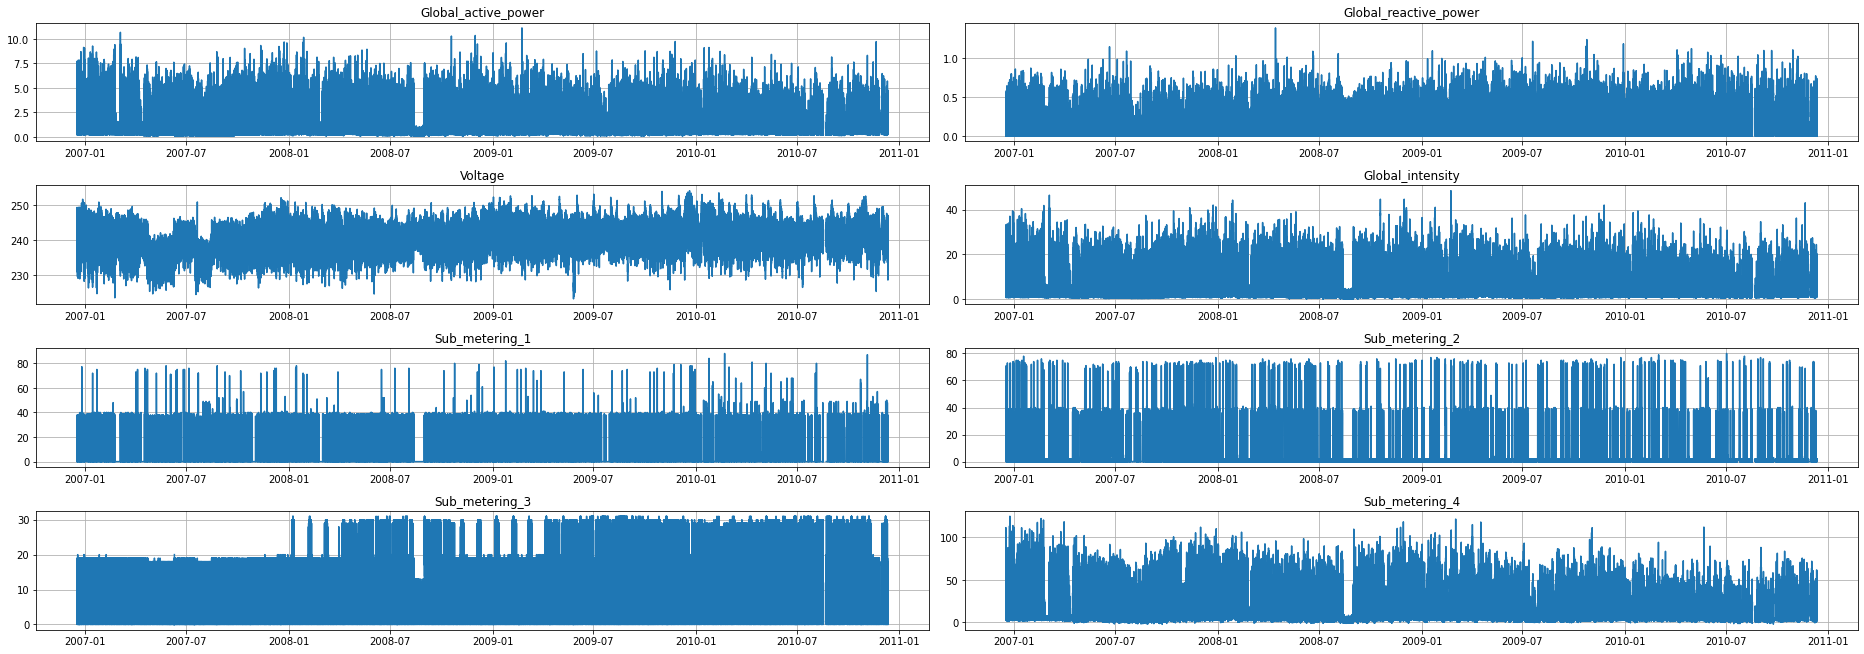

In [11]:
plot_time_values(df.loc[::], size=(26,18))

## The dataset separated by year
By adding a heatmap for the entire year we can confirm what we saw from the global active power, that at the end/begining of the year a higher power consumption is expected

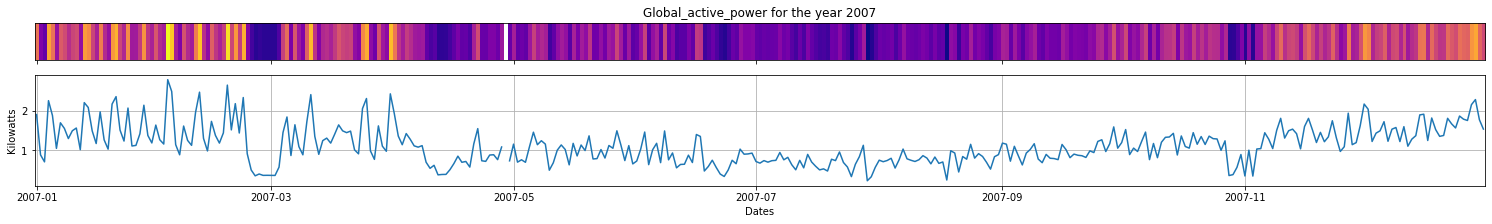

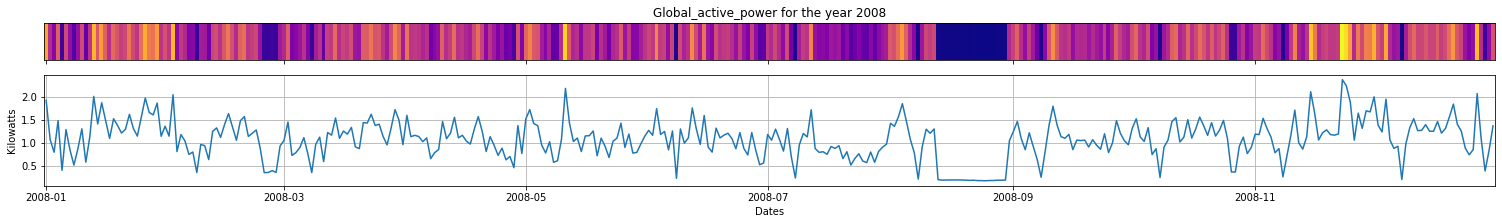

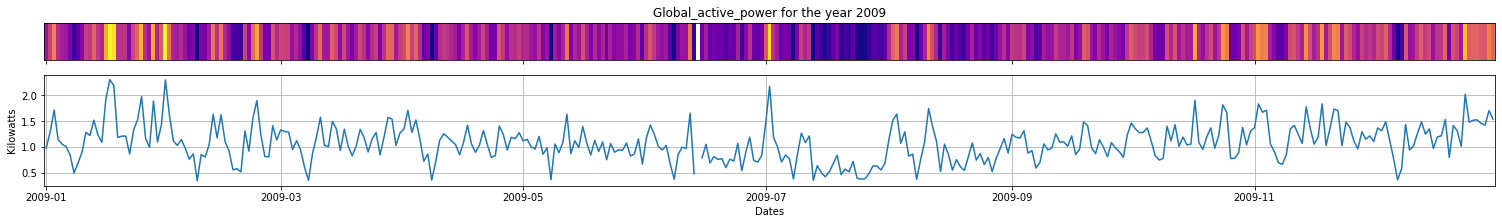

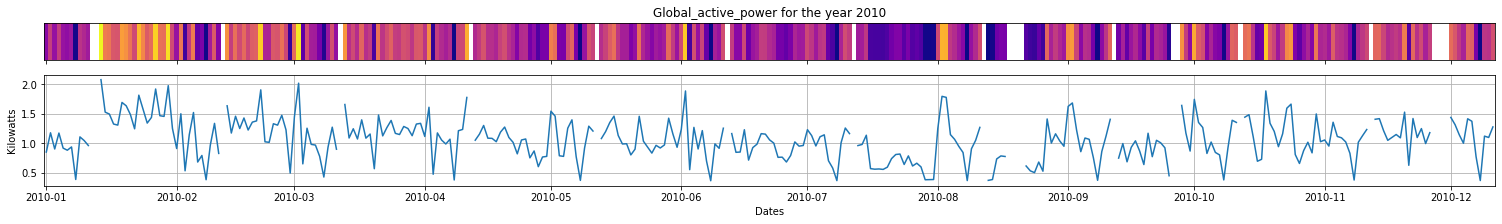

In [12]:
years = ['2007', '2008', '2009', '2010']
for year in years:
    x = df_daily.loc[year].index
    y = df_daily.loc[year]['Global_active_power']
    plot_time_with_heatmap(x, y, 'Dates', 'Kilowatts', title=f'Global_active_power for the year {year}', size=(26,3))

## The dataset separated by days
Thinking about how the dataset works on a daily basis, during an entire week is important, and it seems that the household consumes more energy in the mornings and at night.

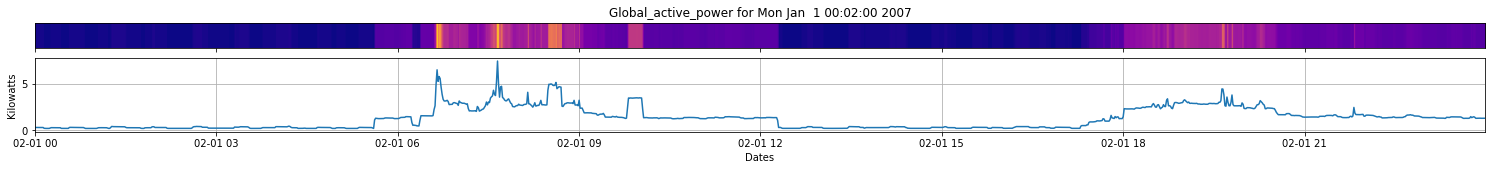

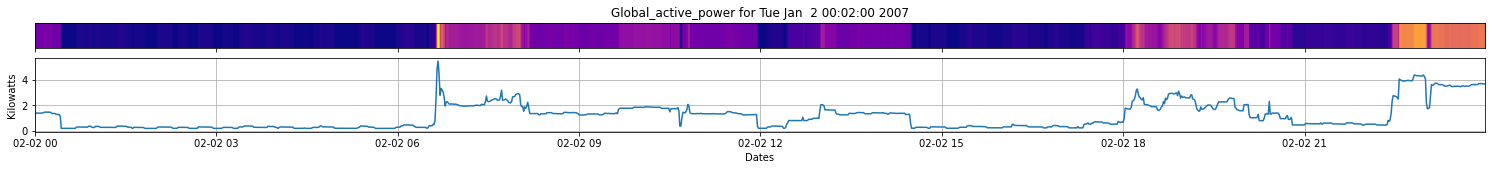

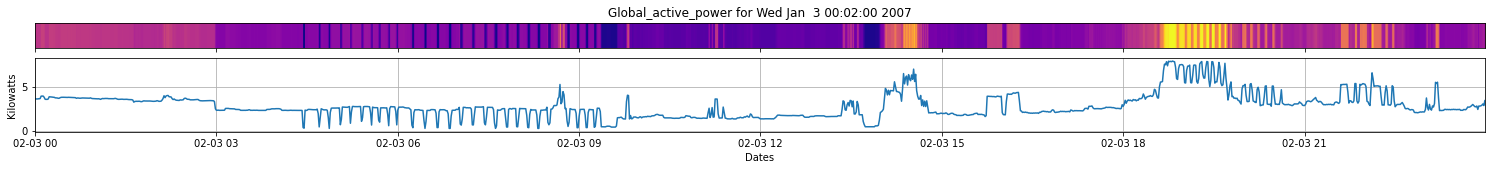

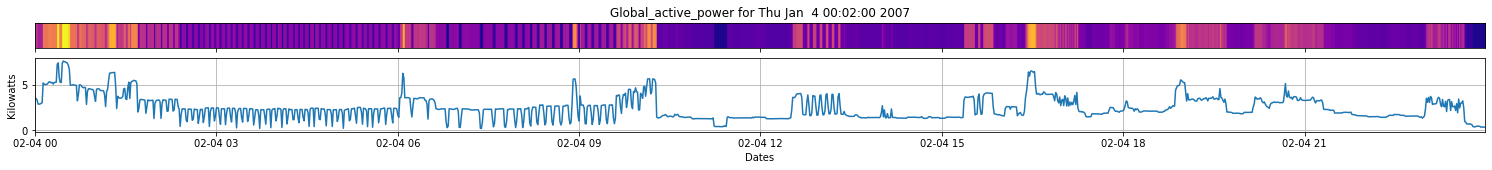

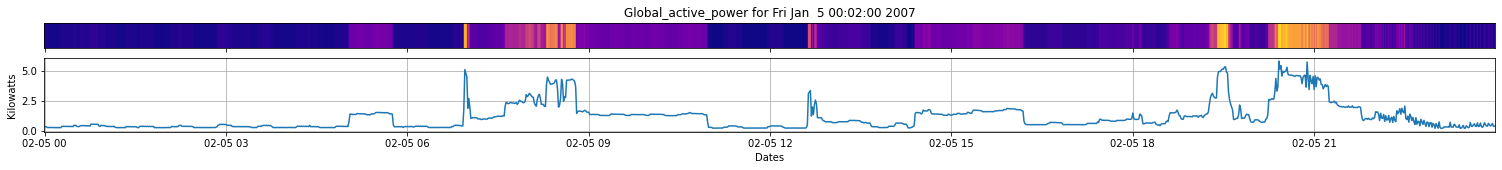

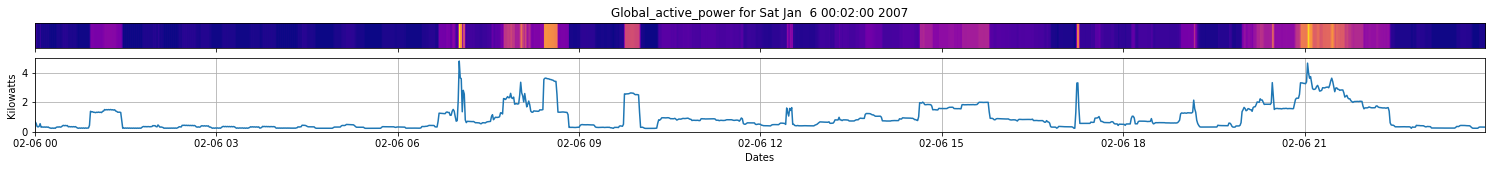

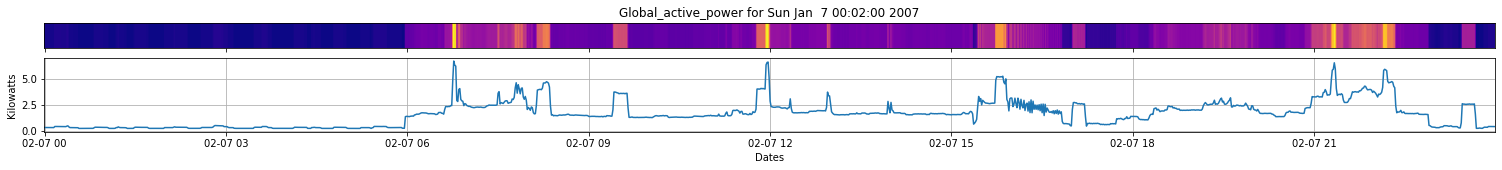

In [13]:
year_n_month = '2007-02'
for day in range(1, 8):
    date_v = f'{year_n_month}-{day}'
    datetime_v = datetime.strptime(date_v, '%Y-%M-%d')
    x = df.loc[date_v].index
    y = df.loc[date_v]['Global_active_power']
    plot_time_with_heatmap(x, y, 'Dates', 'Kilowatts', title=f'Global_active_power for {datetime_v.strftime("%c")}', size=(26,2))